In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from submodular_net import SubmodularNet
import torch
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class TParams:
    def __init__(self, lr=0.001, b1=None, b2=None, iters=int(1e3)):
        self.lr = lr
        self.b1 = b1
        self.b2 = b2
        self.iters = iters

    def __str__(self):
        return json.dumps(
            {"lr": self.lr, "b1": self.b1, "b2": self.b2, "iters": self.iters}
        )

In [4]:
def loss(net, x, y):
    return torch.sum((net.forward(x) - y) ** 2)

In [5]:
def train(net, fit_fn, a, b, dx, tparams, verbose=True):
    """
    Train the net to minimize a least squares objective between itself and the given fit_fn on the interval [a, b]
    by fitting regularly sampled points [a, a+dx, a+2dx, ..., b].

    fit_fn - (np.ndarray) -> (np.ndarray): map an input tensor to an output tensor
    a - (torch.float32): beginning of interval
    b - (torch.float32): end of interval
    dx - (torch.float32): step size
    tparams - TParams: parameters to use for training
    """
    x = torch.tensor(
        torch.arange(a, b, dx), dtype=torch.float32
    ).view([-1, 1])
    y = fit_fn(x)

    opt = torch.optim.Adam(
        params=net.parameters(), lr=tparams.lr
    )

    if verbose:
        rng = trange(tparams.iters)
    else:
        rng = range(tparams.iters)

    for itr in rng:
        opt.zero_grad()
        loss_this_itr = loss(net, x, y)
        
        loss_this_itr.backward()
        if (itr % 1000 == 0):
            if (not verbose): print(f"Iteration: {itr + 1}")
            print(loss_this_itr)
            # for name, param in net.named_parameters():
            #      print(param.grad)
        opt.step()
        net.clamp_weights()


In [6]:
def plot(net, fit_fn, a, b, dx):
    x = torch.arange(a, b, dx)
    x_pt = torch.tensor(x, dtype=torch.float32).view([-1, 1])
    y_true = fit_fn(x)
    y_est = net.forward(x_pt).cpu().detach().numpy()

    plt.plot(x, y_true, label="True")
    plt.plot(x, y_est, label="Estimate")
    plt.show()

In [7]:
# fit_fn = lambda x : torch.ones_like(x) - torch.exp(-x)
fit_fn = lambda x : (x ** 3) + (x ** 2)
a = -1
b = 1
dx = 0.1

tparams = TParams(lr=1e-2, iters=int(1e4))

In [8]:
%load_ext autoreload
%autoreload 2
from submodular_net import SubmodularNet

network = SubmodularNet([1, 50, 50, 1], [1, 50, 50, 1], 1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/devarora/ml/submodular_nn/icnn.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/Users/devarora/ml/submodular_nn/icnn.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(torch.rand(size=(odim, idim)), device=self.device)
/Users/devarora/ml/submodular_nn/icnn.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(


In [9]:
train(network, fit_fn, a, b, dx, tparams, verbose=False)

/var/folders/6z/xg9c2xxn1lg34383kjmcgxfw0000gn/T/ipykernel_66630/621821020.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(


Iteration: 1
tensor(3504017.5000, grad_fn=<SumBackward0>)
Iteration: 1001
tensor(130.9567, grad_fn=<SumBackward0>)
Iteration: 2001
tensor(2.4263, grad_fn=<SumBackward0>)
Iteration: 3001
tensor(1.4048, grad_fn=<SumBackward0>)
Iteration: 4001
tensor(0.8996, grad_fn=<SumBackward0>)
Iteration: 5001
tensor(0.5957, grad_fn=<SumBackward0>)
Iteration: 6001
tensor(0.3691, grad_fn=<SumBackward0>)
Iteration: 7001
tensor(0.2178, grad_fn=<SumBackward0>)
Iteration: 8001
tensor(0.1335, grad_fn=<SumBackward0>)
Iteration: 9001
tensor(0.0914, grad_fn=<SumBackward0>)


/var/folders/6z/xg9c2xxn1lg34383kjmcgxfw0000gn/T/ipykernel_66630/1364096438.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_pt = torch.tensor(x, dtype=torch.float32).view([-1, 1])


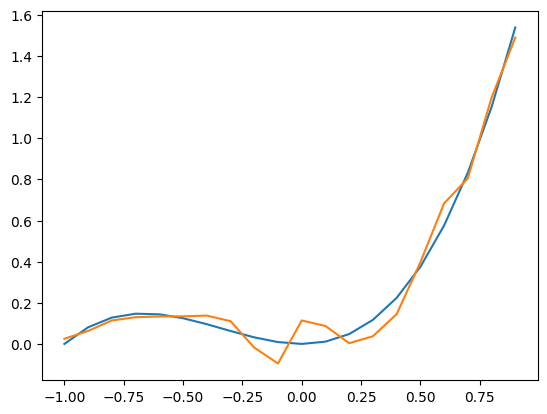

In [10]:
plot(network, fit_fn, a, b, dx)

In [11]:
fit_fn(-0.66)

0.148104

In [12]:
fit_fn = lambda x : torch.exp(x)
train(network, fit_fn, a, b, dx, tparams, verbose=False)

/var/folders/6z/xg9c2xxn1lg34383kjmcgxfw0000gn/T/ipykernel_66630/621821020.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(


Iteration: 1
tensor(16.4170, grad_fn=<SumBackward0>)
Iteration: 1001
tensor(1.0367, grad_fn=<SumBackward0>)
Iteration: 2001
tensor(0.1512, grad_fn=<SumBackward0>)
Iteration: 3001
tensor(0.4041, grad_fn=<SumBackward0>)
Iteration: 4001
tensor(0.0043, grad_fn=<SumBackward0>)
Iteration: 5001
tensor(0.0005, grad_fn=<SumBackward0>)
Iteration: 6001
tensor(8.7972e-05, grad_fn=<SumBackward0>)
Iteration: 7001
tensor(3.3453e-05, grad_fn=<SumBackward0>)
Iteration: 8001
tensor(2.4340e-05, grad_fn=<SumBackward0>)
Iteration: 9001
tensor(1.9848e-05, grad_fn=<SumBackward0>)


/var/folders/6z/xg9c2xxn1lg34383kjmcgxfw0000gn/T/ipykernel_66630/1364096438.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_pt = torch.tensor(x, dtype=torch.float32).view([-1, 1])


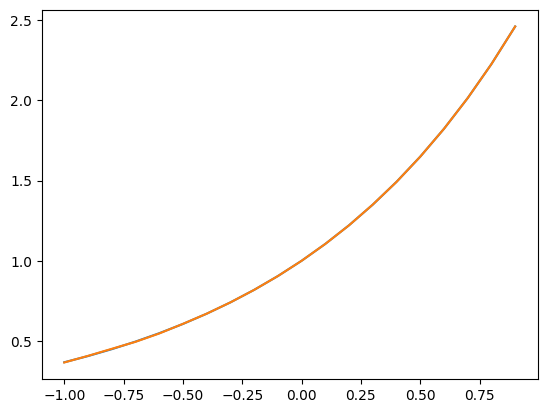

In [13]:
plot(network, fit_fn, a, b, dx)

In [14]:
fit_fn = lambda x : torch.sin(x)
a = -10
b = 10

train(network, fit_fn, a, b, dx, tparams, verbose=False)

/var/folders/6z/xg9c2xxn1lg34383kjmcgxfw0000gn/T/ipykernel_66630/621821020.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(


Iteration: 1
tensor(368.2881, grad_fn=<SumBackward0>)
Iteration: 1001
tensor(0.1056, grad_fn=<SumBackward0>)
Iteration: 2001
tensor(0.0411, grad_fn=<SumBackward0>)
Iteration: 3001
tensor(0.0623, grad_fn=<SumBackward0>)
Iteration: 4001
tensor(0.0486, grad_fn=<SumBackward0>)
Iteration: 5001
tensor(0.0431, grad_fn=<SumBackward0>)
Iteration: 6001
tensor(0.0216, grad_fn=<SumBackward0>)
Iteration: 7001
tensor(0.0953, grad_fn=<SumBackward0>)
Iteration: 8001
tensor(0.0134, grad_fn=<SumBackward0>)
Iteration: 9001
tensor(0.0225, grad_fn=<SumBackward0>)


/var/folders/6z/xg9c2xxn1lg34383kjmcgxfw0000gn/T/ipykernel_66630/1364096438.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_pt = torch.tensor(x, dtype=torch.float32).view([-1, 1])


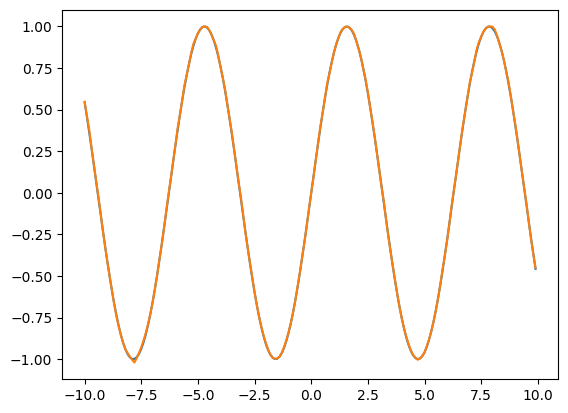

In [15]:
plot(network, fit_fn, a, b, dx)